# ML4SCI Task 3.2

**Converting array of (8,) into (8,125,125) and making the dataset and dataloader**

 **the array (8,) contains each element as array of 125 elements which inturn is an array of 125 elements**

#  End-to-End Deep Learning Regression for Measurements with the CMS Experiment

In [55]:
# importing basic modules"
import pandas as pd
import numpy as np


**Lets import the data.....**

**We find that the data is toooo huge and normal pd.read_parquet('') causes cpu overload and hence doesnt get read**

**SO WHAT IS MY APPRACH??**

**I ran a for loop from 0 to total rows with step size of chunk_size variable
Then reading the ith elementand converting it into pandas
Lastly appending them all to form the dataFrame
TO SET THE NUMBER OF EXAMPLES TO EXTRACT**

**If u set the value of chunk size as n , then u will get total rows//n number of examples**

In [56]:
import pyarrow.parquet as pq
# Set the size of each chunk in rows
chunk_size = 50

# Create a Parquet file reader object
parquet_file = pq.ParquetFile('/kaggle/input/ml4sci-regression-dataset/top_gun_opendata_3.parquet')

# Determine the total number of rows in the file
total_rows = parquet_file.metadata.num_rows

# Loop over the file in chunks
dfs = []
for i in range(0, total_rows, chunk_size):
    # Read a chunk of rows from the file
    chunk = parquet_file.read_row_group(i)
    df = chunk.to_pandas()
#     print(i)
    dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
final_df3 = pd.concat(dfs, ignore_index=True)


In [57]:
parquet_file.metadata    #Shows us what is there inside the parquet file

  created_by: parquet-cpp version 1.5.1-SNAPSHOT
  num_columns: 5
  num_rows: 150448
  num_row_groups: 150448
  format_version: 1.0
  serialized_size: 72299402

In [58]:
parquet_file.read_row_group(0).to_pandas()  # to convert into pandas 

,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0


In [59]:
final_df3['X_jet'][0].shape

(8,)

Above we see that the each element under the X_jets is just an array of 8 elements... but that 8 elements is it self an array of 125 elements where that 125 elements is an array of 125 elements

I created a function that stacks this and creates a 8,125,125 matrix

In [60]:
final_df3.head()


,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",413.781799,53.0,962.853760,38.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",288.204926,63.0,926.835327,39.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",269.854034,44.0,656.809326,37.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",118.995079,46.0,411.588104,38.0


In [61]:
total_rows

150448

In [62]:
final_df3['X_jet'][0].shape


(8,)

# created function to convert 

In [63]:
def to_3d(arr):
    vishak=[]
    for i in range (0,8):
        vis=np.stack(np.stack(arr)[i],axis=-1)
        vishak.append(vis)
    vishak=np.array(vishak)
    return vishak


In [64]:
rr=final_df3['X_jet'].shape[0]

In [65]:
for i in range (0,rr):
    final_df3['X_jet'][i]=to_3d(final_df3['X_jet'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
final_df3['X_jet'][0].shape

(8, 125, 125)

**So we see that our dataframe final_df now has a column called X_jets which contains 8,125,125 sized matrix**

In [67]:
import matplotlib.pyplot as plt

**Lets plot and see how the image looks like**

# visualizing the data

Mass is =232.84686279296875


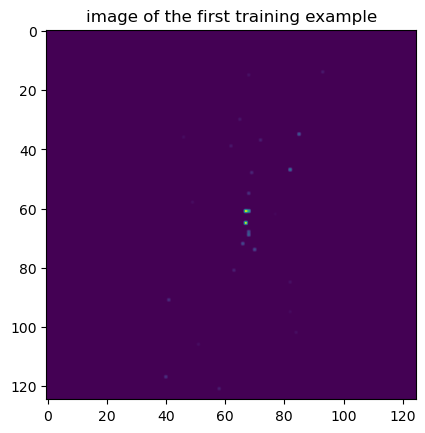

In [68]:
plt.imshow(final_df3['X_jet'][0][0,:,:])


plt.title("image of the first training example");
label=final_df3['m'][0]
print(f"Mass is ={label}")

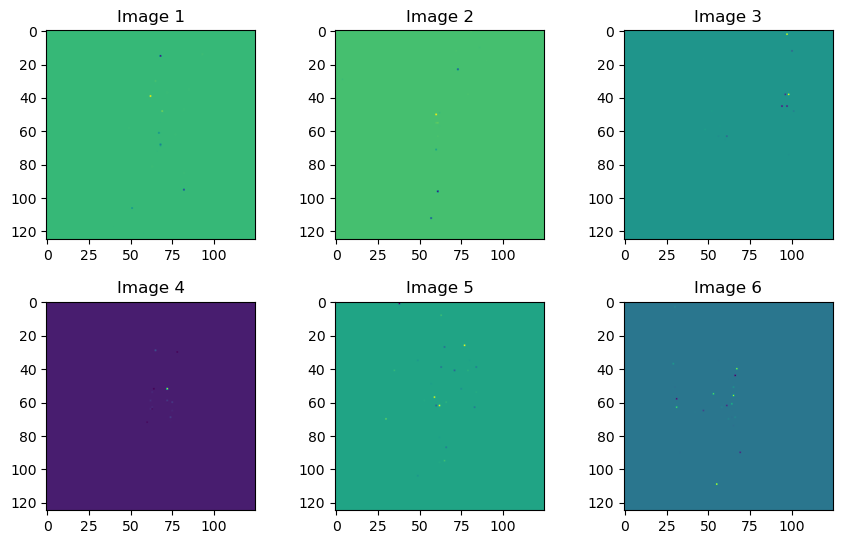

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and image ids, and plot each image on a separate subplot
for i, ax in enumerate(axes.flatten()):
    image = final_df3['X_jet'][i][2,:,:]
    ax.imshow(image)
    ax.set_title(f'Image {i+1}')
    
# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

**the plot of the mass lets plot the histogram**

<AxesSubplot:>

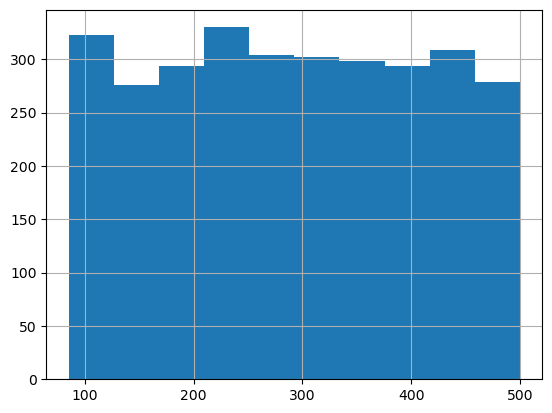

In [70]:
final_df3['m'].hist()

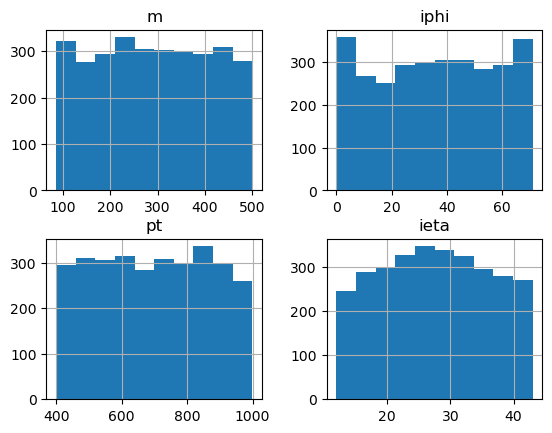

In [71]:
final_df3.hist();

# Dataset and DataLoader

**Splitting the data into train and test set in ratio 80/100**

In [72]:
from sklearn.model_selection import train_test_split 

In [73]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader , random_split

In [74]:
final_df3.head()

,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",413.781799,53.0,962.853760,38.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",288.204926,63.0,926.835327,39.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",269.854034,44.0,656.809326,37.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",118.995079,46.0,411.588104,38.0


**DataSet Description: 125x125 image matrices with name of variables: ieta and iphi, with 4 channels called X_jet (Track pT, DZ and D0, ECAL). Please use at least ECAL and Track pT channels and ‘am‘ as the target feature. Please train your model on 80% of the data and evaluate on the remaining 20%. Please make sure not to overfit on the test dataset - it will be checked with an independent sample.**

**electromagnetic calorimeter (ECAL)**

**momentum pT > 20 GeV**

In [75]:
Dataset

torch.utils.data.dataset.Dataset

In [76]:
class regdataset(Dataset):
    
    def __init__(self,data):
        self.df= data
        self.X= data['X_jet']
        self.y=data['m']
        
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        return torch.tensor(self.X[idx],dtype=torch.float32), torch.tensor(self.y[idx],dtype=torch.float32)
    

**create the instance of the above class**

In [77]:
train_data=regdataset(final_df3)

In [78]:
next(iter(train_data))[0].shape

torch.Size([8, 125, 125])

**Splitting the data into train and test set in ratio 80/100**

In [79]:
train_size = int(0.8 * len(train_data))  # use 80% of data for training
test_size = len(train_data) - train_size  # use remaining 20% for testing
train_dataset, test_dataset = random_split(train_data, [train_size, test_size])  # split dataset into train and test

# DataLoader

In [80]:
train_loader= DataLoader(train_dataset, batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [81]:
next(iter(train_loader))[0].shape

torch.Size([32, 8, 125, 125])

# Architecture

In [82]:
import torch.nn.functional as F

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.conv1 = nn.Conv2d(8, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 31 * 31, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(-1, 64 * 31 * 31)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()


In [83]:
model= RegressionModel()

In [84]:
model(next(iter(train_loader))[0])

tensor([0.0413, 0.0181, 0.0356, 0.0544, 0.0715, 0.0390, 0.0302, 0.0551, 0.0207,
        0.0267, 0.0258, 0.0235, 0.0337, 0.0871, 0.0215, 0.0179, 0.0072, 0.0260,
        0.0387, 0.0372, 0.0474, 0.0205, 0.0495, 0.0019, 0.0656, 0.0267, 0.0318,
        0.0396, 0.0311, 0.0308, 0.0138, 0.0566], grad_fn=<SqueezeBackward0>)

In [85]:
final_df3['X_jet'][0].shape

(8, 125, 125)

# Training Loop

In [86]:
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the model and move it to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [109]:
model_state_dict = torch.load('/kaggle/working/checkpoint_epoch20.pth')['model']

# Load the saved state_dict
model.load_state_dict(model_state_dict)

<All keys matched successfully>

[Epoch 1, Batch 1] Loss: 193.455
[Epoch 2, Batch 1] Loss: 51.642
[Epoch 3, Batch 1] Loss: 34.550
[Epoch 4, Batch 1] Loss: 10.876
[Epoch 5, Batch 1] Loss: 14.148
[Epoch 6, Batch 1] Loss: 14.631
[Epoch 7, Batch 1] Loss: 10.042
[Epoch 8, Batch 1] Loss: 6.467
[Epoch 9, Batch 1] Loss: 2.851
[Epoch 10, Batch 1] Loss: 1.504
[Epoch 11, Batch 1] Loss: 5.554
[Epoch 12, Batch 1] Loss: 1.697
[Epoch 13, Batch 1] Loss: 6.002
[Epoch 14, Batch 1] Loss: 0.745
[Epoch 15, Batch 1] Loss: 1.759
[Epoch 16, Batch 1] Loss: 0.875
[Epoch 17, Batch 1] Loss: 1.460
[Epoch 18, Batch 1] Loss: 0.737
[Epoch 19, Batch 1] Loss: 0.513
[Epoch 20, Batch 1] Loss: 1.387


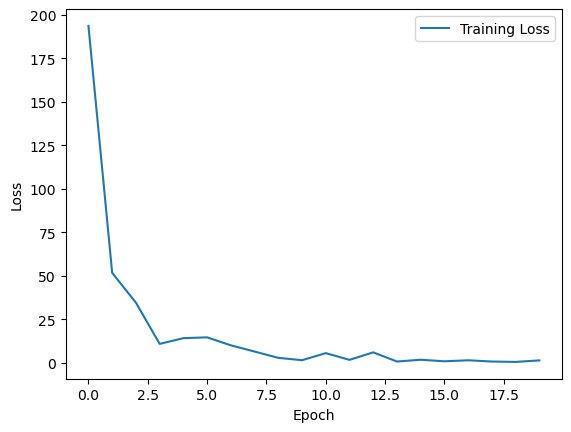

In [101]:
# Training loop
num_epochs = 20
train_losses = []
for epoch in range(num_epochs):
    flag=0
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move to GPU if available
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Print statistics every 100 mini-batches
        if (flag==0):
            print('[Epoch %d, Batch %d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / len(train_loader)))
            train_losses.append(running_loss / len(train_loader))
            running_loss = 0.0
            flag=1
    
    # Save model checkpoint after each epoch
#     checkpoint = {
#         'model': model.state_dict(),
#         'optimizer': optimizer.state_dict(),
#         'epoch': epoch + 1,
#         'train_losses': train_losses
#     }
#     torch.save(checkpoint, f'checkpoint_epoch{epoch+1}.pth')
    
# Plot learning curve
plt.plot( train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [107]:
# Save model checkpoint after each epoch
checkpoint = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch + 1,
        'train_losses': train_losses
    }
torch.save(checkpoint, f'checkpoint_epoch{epoch+1}.pth')

In [108]:
epoch

19

In [102]:
model(next(iter(train_loader))[0].to(device))

tensor([344.2425, 244.3898, 471.8301, 258.6857, 268.6687, 453.0946, 451.5805,
         94.2973, 302.2575, 101.5701, 271.8506, 212.2121, 155.0337, 230.8695,
        143.7236, 426.4485, 512.3407, 472.8112, 467.7223, 205.0549, 326.8646,
        287.9998, 269.6748, 420.9340, 183.2905, 502.2060, 321.7136, 197.0220,
        489.6899, 138.9460, 380.6924, 255.0244], device='cuda:0',
       grad_fn=<SqueezeBackward0>)

In [103]:
next(iter(train_loader))[1]

tensor([435.9501, 145.4780, 199.6428, 475.1826, 155.7472, 418.8495, 118.8325,
        407.4485, 424.7755, 101.6757, 330.8071, 265.5256, 278.7599, 219.4637,
        403.5717, 350.6561, 485.2176, 227.9735, 239.2641, 146.2453, 234.4510,
        252.0820, 143.3688, 195.1143, 415.6401, 449.9235, 400.5685, 344.6447,
        184.5919, 339.1647, 454.3514, 191.3254])

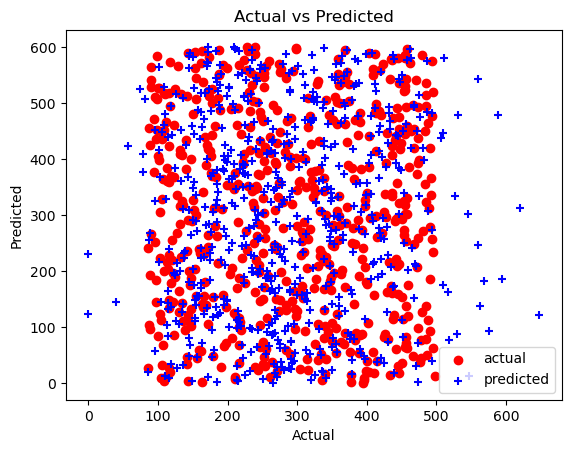

In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode for testing
model.eval()

# Lists to store actual and predicted values
y_true = []
y_pred = []

# Disable gradient calculation during testing
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        # Move data to device
        data, target = data.to(device), target.to(device)
        
        # Forward pass to get predicted output
        output = model(data)
        
        # Append actual and predicted values to the lists
        y_true.extend(target.cpu().numpy().tolist())
        y_pred.extend(output.cpu().numpy().tolist())

# Plot the actual vs predicted values with actual values in blue and predicted values in red
plt.scatter(y_true, range(len(test_dataset)), color='red',label='actual')
plt.scatter(y_pred, range(len(test_dataset)), color='blue',marker='+',label="predicted")
# plt.scatter(x, y, marker='+')
# plt.plot([min(y_true+y_pred), max(y_true+y_pred)], [min(y_true+y_pred), max(y_true+y_pred)], color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.title('Actual vs Predicted')
plt.show()


**Above we see that the actual values are marked by the red dots and the predicted values are marked by blue +**

**we are able to see closeness in overlapping**

In [105]:
#lets see the MSE of the test data

In [106]:
criterion(torch.tensor(y_pred),torch.tensor(y_true))

tensor(5907.3794)